In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


/kaggle/input/sales-data-analysis/Sales Data.csv


In [2]:
#  Load the Dataset
import pandas as pd

df = pd.read_csv('/kaggle/input/sales-data-analysis/Sales Data.csv')

print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [3]:
# Add a Revenue column
df['Revenue'] = df['Price Each'] * df['Quantity Ordered']

# Verify the new column
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  Revenue  
0  1700.00   New York City     0  1700.00 

In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Revenue             0
dtype: int64


In [5]:
# Convert 'Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year, month, and day for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

# Check updated dataset
print(df.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  Revenue  Year

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


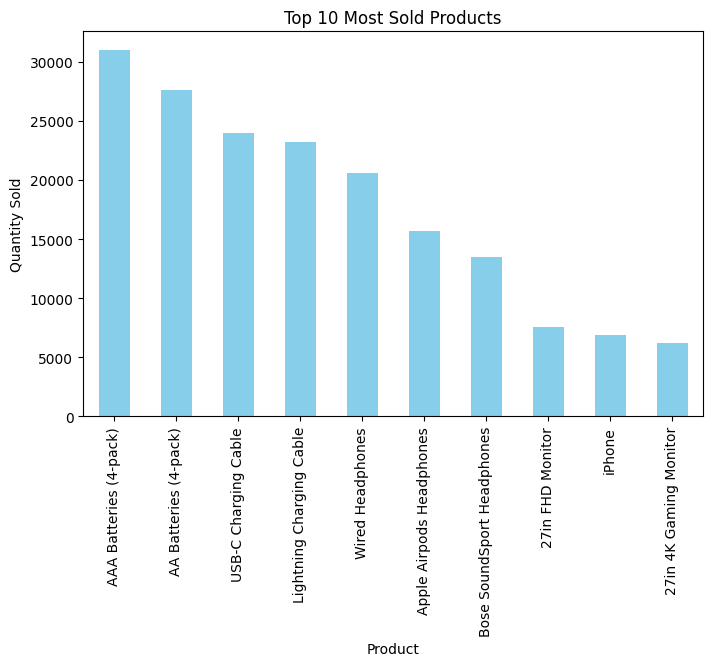

In [6]:
# Calculate total quantity sold per product
most_sold = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

print(most_sold.head(10))

# Visualization
import matplotlib.pyplot as plt
most_sold.head(10).plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 10 Most Sold Products')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.show()

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Revenue, dtype: float64


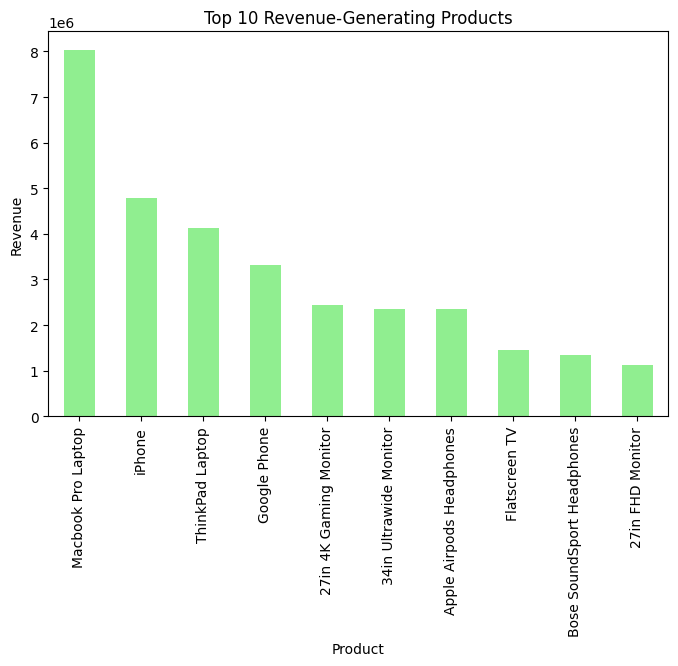

In [7]:
# Calculate total revenue per product
most_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

# Display the top 5 revenue-generating products
print(most_revenue.head(10))

# Visualization
most_revenue.head(10).plot(kind='bar', color='lightgreen', figsize=(8, 5))
plt.title('Top 10 Revenue-Generating Products')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.show()

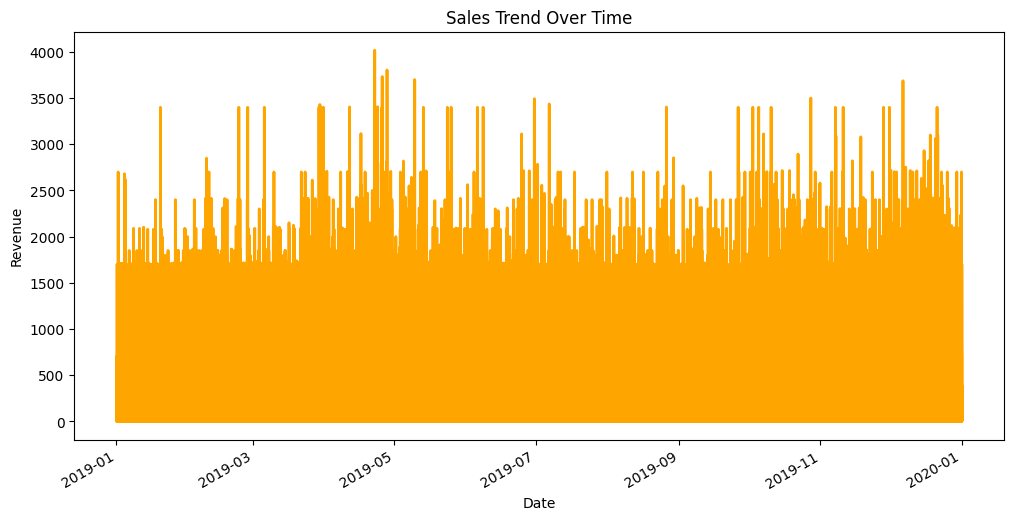

In [8]:
# Sales Trend Over Time

sales_trend = df.groupby('Order Date')['Revenue'].sum()

# Visualization
sales_trend.plot(figsize=(12, 6), color='orange', linewidth=2)
plt.title('Sales Trend Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.show()

Monthly Sales:
 Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Revenue, dtype: float64


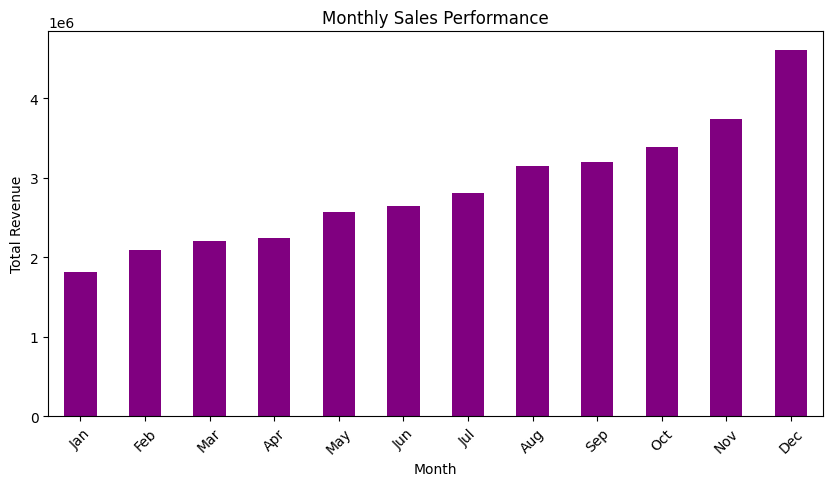

In [9]:
# Which Month Had the Highest Sales?
# Extract the month from the Date column
df['Month'] = df['Order Date'].dt.month

# Group by Month and calculate total revenue
monthly_sales = df.groupby('Month')['Revenue'].sum().sort_values(ascending=True)
print("Monthly Sales:\n", monthly_sales)

# Visualization
monthly_sales.plot(kind='bar', color='purple', figsize=(10, 5))
plt.title('Monthly Sales Performance')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

The peak sales day was 2019-04-22 13:26:00, with a revenue of 4017.94.


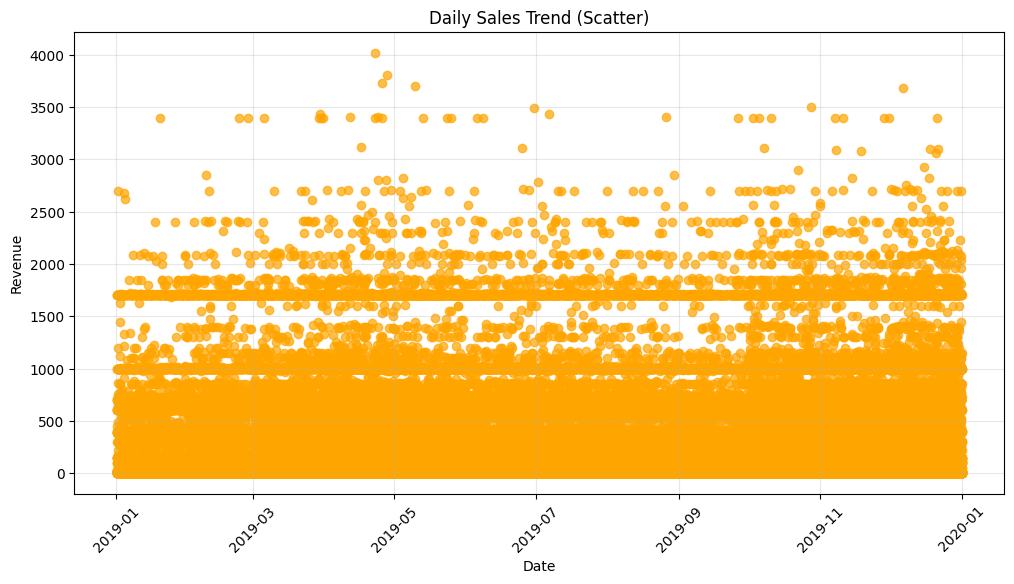

In [10]:
# Peak Sales Day

# Group by Date and calculate total revenue
daily_sales = df.groupby('Order Date')['Revenue'].sum().sort_values(ascending=False)

# Display the date with the highest revenue
peak_sales_day = daily_sales.idxmax()
peak_sales_amount = daily_sales.max()
print(f"The peak sales day was {peak_sales_day}, with a revenue of {peak_sales_amount}.")

plt.figure(figsize=(12, 6))
plt.scatter(daily_sales.index, daily_sales.values, color='orange', alpha=0.7)
plt.title('Daily Sales Trend (Scatter)')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [11]:
# Average Revenue Per Transaction
avg_revenue_per_transaction = df['Revenue'].mean()
print(f"Average Revenue per Transaction: {avg_revenue_per_transaction:.2f}")

Average Revenue per Transaction: 185.49


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


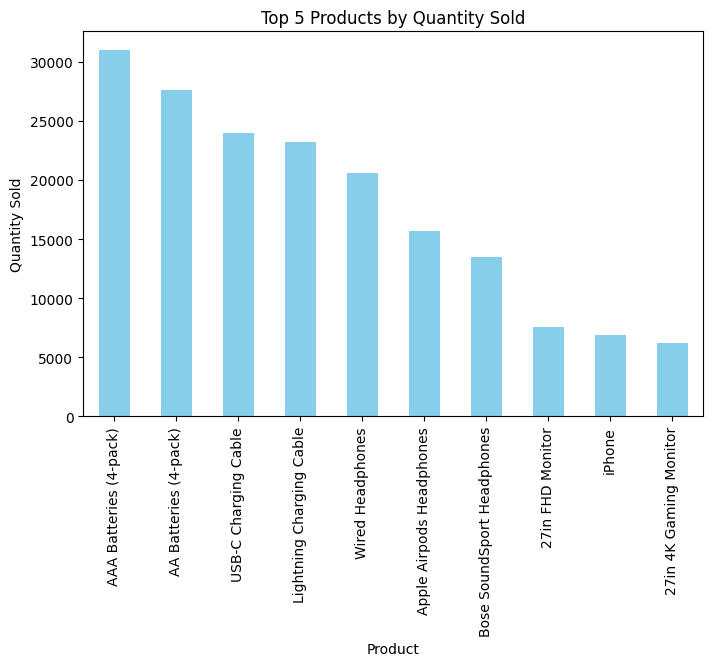

In [12]:
# Top Products by Quantity Sold
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(top_products.head(10))

# Visualization
top_products.head(10).plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 5 Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.show()

In [13]:
# Correlation Between Price and Quantity
# Scatter plot of Price vs. Quantity
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows with numeric data
valid_rows = df[
    pd.to_numeric(df['Price Each'], errors='coerce').notna() & 
    pd.to_numeric(df['Quantity Ordered'], errors='coerce').notna()
]

# Convert columns to numeric
valid_rows['Price Each'] = pd.to_numeric(valid_rows['Price Each'])
valid_rows['Quantity Ordered'] = pd.to_numeric(valid_rows['Quantity Ordered'])

# Retain only numeric columns for correlation
numeric_data = valid_rows.select_dtypes(include=['float64', 'int64'])

print("Numeric Data for Correlation:")
print(numeric_data.head())

Numeric Data for Correlation:
   Unnamed: 0  Order ID  Quantity Ordered  Price Each    Sales  Hour  Revenue
0           0    295665                 1     1700.00  1700.00     0  1700.00
1           1    295666                 1      600.00   600.00     7   600.00
2           2    295667                 1       11.95    11.95    18    11.95
3           3    295668                 1      149.99   149.99    15   149.99
4           4    295669                 1       11.95    11.95    12    11.95


Correlation between Price and Quantity: -0.15


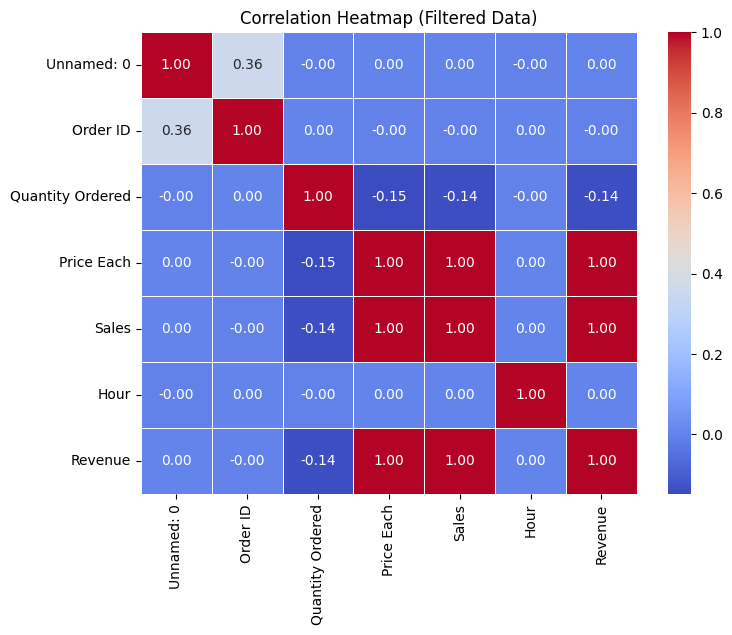

In [14]:
#  Perform Analysis on Filtered Data

# Correlation between Price and Quantity
correlation = df['Price Each'].corr(df['Quantity Ordered'])
print(f"Correlation between Price and Quantity: {correlation:.2f}")


# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Filtered Data)')
plt.show()

**@Md-Shahid-S**